In this checkpoint, we continue our discussion on data cleaning with a focus on outliers. If you think we've already spent too much time on the tedious and boring topic of data cleaning, we can assure you that we can't exaggerate *enough* the importance of the data cleaning phase for *any* data science project! Even at this checkpoint, we're still at the data cleaning phase of the EDA process:

![data_cleaning.png](../assets/data_cleaning.png)

Another foundational issue in data cleaning is how to handle outliers. According to [Wikipedia](https://en.wikipedia.org/wiki/Outlier):

<h3 align="center">*An outlier is an observation point that is distant from other observations.*</h3>

Understanding what "being distant from other observations" means is easy if we think in a two-dimensional space. For example, if we had a dataset of the net worth of the 7 billion people on earth, then the net worth of the richest 1,000 people would be visible outliers as they are way higher than the rest.

In general, we get outliers in the data in two ways: 

1. An error in the data collection process may create outliers. Take, for example, a "Salary" column in an Excel workbook where the values are stored in thousands. If we mistakenly type 100,000 instead of 100, we created an outlier due to error. This is a type of what is more broadly called "measurement error."

2. Sometimes, the processes that generate the data produce extreme and rare values which can be regarded as true outliers. In this case, the abnormal data is not due to measurement error but to the extreme nature of the observation itself. These cases should be rare.

In this checkpoint, we'll cover:

* Why we "don't like" outliers
* How to detect outliers
* How to treat outliers

Before proceeding further, let's highlight that outliers are defined for continuous variables and not for categorical ones. All discussion in this checkpoint, then, applies only to continuous variables.

# Do we really "not like" outliers? 

Outliers can contain valuable information and should not be discarded without close consideration of what is causing them. However, for data science models and applications, we often don't "like" outliers because:

* They skew the descriptive statistics of the data. For example, consider one of the most commonly used descriptive statistics -- the mean. This value can be severely influenced by outliers.

* Some machine learning models are sensitive to extreme values. In order to get more accurate estimates, we need to eliminate those values from our dataset.

To see the effects of outliers, watch the gif below and see how an outlier influences the relationship between the data points (The orange line represents the relationship between the data points):

![outlier](../assets/outlier.gif "outlier")

That being said, some tasks in data science are *all about* the outliers. For example, in anomaly detection the main goal is to identify anomalies -- which are often outliers themselves! This area of data science, however, is outside the scope of this course. 

# Outlier detection

Detecting outliers, of course, is the first step to handling them. But, just as with many of our previous tasks, there is no "golden rule" to define what constitutes an outlier. When we talk about outliers, we should make sure that they are **rare** and have **extreme** values. Defining just how *rare* and *extreme* is a judgment call and depends on the task at hand. That being said, there are some commonly used thresholds for defining outliers. 

Usually, we will use standard deviation to define the outliers. Values that reside outside the range of **(mean - T*standard deviation, mean + T*standard deviation)** are considered outliers. Here **T** stands for the threshold. Depending on the case, it's common to set the threshold to 1.5, 2, 3 or 5. But, as mentioned earlier, the exact threshold value varies depending on the project in question.

In this checkpoint, we cover two main ways of outlier detections: 

1. Visualizing the variables, and
2. Using statistical techniques.

While the latter is more scientific and reliable the former is easier to apply. Let's begin with the visualization.

## Visually detecting the outliers

Several common visualizations will help us identify extreme values in the data. Probably the most famous is the **box plot**. Box plots rest on **interquartile ranges** and feature "whiskers" on either end of the "box". The points that lie beyond the whiskers are called **fliers** and are usually regarded as outliers. In Matplotlib the whiskers by default reach to 1.5 * the standard deviation away from the first and the third quartiles. We can control this setting using the `whis` argument. So, let's draw a box plot for the *Video views* variable from the Youtube dataset:

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

youtube_df = pd.read_sql_query('select * from youtube',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

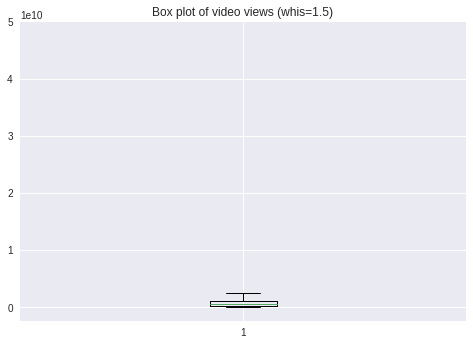

In [3]:
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views (whis=1.5)")
plt.show()

The resulting box is quite compressed and there seem to be a lot of outliers in the variable. Let's adjust our threshold to  `whis=20`:

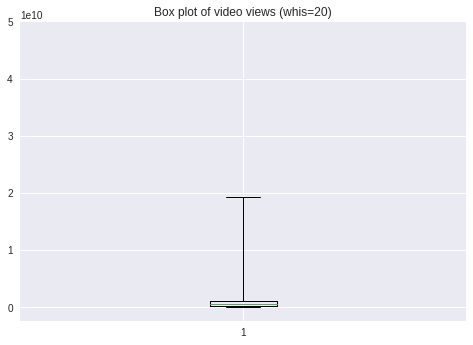

In [4]:
plt.boxplot(youtube_df["Video views"], whis=20)
plt.title("Box plot of video views (whis=20)")
plt.show()

The number of outliers decreased this time because we set the threshold quite high. 

Another useful chart in detecting the outliers is the histogram. Histograms depict the distribution of the variables. Values that lie extreme ends of the graph are potential outliers. Let's draw the histogram of the *Video views* variable:

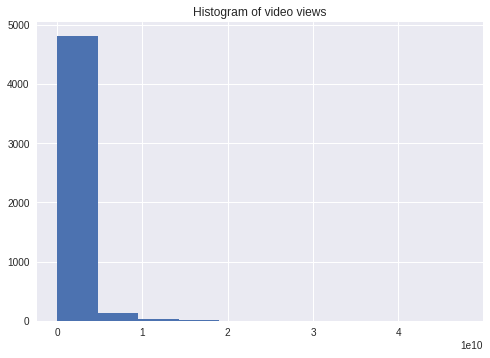

In [5]:
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")
plt.show()

Here we see there are potential outliers on the right-hand range of the data.

Visualization is an easy and effective way of detecting the potential outliers. However, it is a subjective and imprecise investigation. Next, we present more formal statistical methods to detect outliers.

## Statistical methods to detect outliers



### Z-scores

One statistic used to detect the outliers in a variable is the **Z-score**. To calculate Z-scores, we will first scale the variable so that its mean is 0 and standard deviation is 1. Then we can measure how far a value is far away from the mean (0) in terms of standard deviations (1). The bigger the Z-score of a value, the farther it is from the mean, and the more likely it is an outlier. However, we still need to set a threshold for what Z-score constitutes an outlier.

Let's calculate the Z-score's of the *Video views* variable using scipy's `zscore()` function and determine outliers by setting the threshold to 1, 2, 3 and 4:

In [0]:
from scipy.stats import zscore

z_scores = zscore(youtube_df["Video views"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,   11,
         13,   14,   15,   16,   18,   19,   21,   22,   25,   26,   27,
         35,   37,   38,   39,   40,   41,   42,   43,   44,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   57,   58,   59,   61,
         62,   63,   64,   66,   67,   68,   70,   72,   74,   75,   77,
         78,   81,   82,   83,   84,   85,   87,   88,   91,   93,   95,
         98,   99,  105,  106,  111,  112,  113,  114,  116,  120,  121,
        122,  123,  125,  126,  127,  130,  131,  135,  137,  138,  143,
        145,  146,  147,  149,  151,  154,  155,  158,  165,  167,  170,
        171,  172,  174,  176,  182,  184,  187,  193,  198,  200,  201,
        208,  210,  212,  218,  224,  227,  228,  229,  241,  242,  244,
        245,  248,  249,  254,  256,  257,  260,  261,  264,  265,  266,
        268,  269,  270,  271,  273,  277,  282,  283,  284,  287,  

As we can see, the number of outliers decreases as the threshold for the z-scores increases.

### Tukey's method

This method is also known as the **Interquartile Range (IQR)** method and we saw this method in action when we talked about box plots. 

As mentioned earlier, the IQR is the range between the first and the third quartiles. This method considers all values that are outside the threshold of 1.5 times the IQR as outliers. However, we can change this threshold to other values.

Using 1, 1.5, 2,....,4.5 as the threshold values, let's find out the number of outliers in the *Video views* variable using Tukey's method:

In [0]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(youtube_df["Video views"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((youtube_df["Video views"] > max_val) 
                      | (youtube_df["Video views"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 624
The score threshold is: 1.5
Number of outliers is: 475
The score threshold is: 2.0
Number of outliers is: 371
The score threshold is: 2.5
Number of outliers is: 296
The score threshold is: 3.0
Number of outliers is: 242
The score threshold is: 3.5
Number of outliers is: 209
The score threshold is: 4.0
Number of outliers is: 182
The score threshold is: 4.5
Number of outliers is: 151


# How to treat outliers

We've detected the outliers. Now what? We need to do something with them so that they do not affect the reliability of our analysis. Broadly speaking, there are  three approaches we can take in handling outliers:

1. We can **drop the outliers** from our dataset. 

2. We can **cap the values of the outliers** by assigning them new values.

3. We can **transform** the outliers into something harmless for our analysis.

Let's go over each approach in turn. 

## Dropping outliers from the dataset

Dropping the observations with extreme values is probably the easiest way of handling outliers. But, consider our discussion from the previous checkpoint about dropping missing values. By excluding any observations from the dataset, we effectively lose information. This the same case for dropping outliers, especially in small datasets. However, some situations may justify dropping the outliers from the dataset:

* If we know that the outliers stem from measurement error or a problem in the data collection process, we should drop them.

* If dropping the outliers doesn't make any meaningful change in the following phases of analysis, we can drop them. However, we need to replicate our analysis both with the outliers and without them to confirm this.

* If dropping the outliers makes a meaningful change in the following phases but we can't find a proper way of handling them otherwise, we can drop them from our dataset.

## Limiting the values of the outliers

The main problem with the outliers stems from their extreme magnitudes. If we can cap the values of the outliers, their effects on our analysis would be limited. One common way of limiting the outlier values is called **winsorization**. Winsorization can be applied in *one-way* or *two-way* techniques. In one-way winsorization, we either limit the lowest end of the value distribution or the highest end. In two-way winsorization, we set both the lowest end and the highest end. 

The idea in winsorization is to set the values of the extreme points to the value of a specified percentile. For example, we may set the values of the highest end of the distribution to the value of the $95^{th}$ percentile. Similary, we can set the values of the lowest end to the value of the $5^{th}$ percentile.

We can winsorize a variable using scipy's `winsorize()` method. We give a tuple of values as a parameter to this method where the first element of the tuple is the lowest percentile and the second element is the highest percentile in the two-way winsorization. If we want to apply one-way percentile, we can set the corresponding element in this tuple to zero (0). Now, let's winsorize *Video views* variable:

In [0]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_views = winsorize(youtube_df["Video views"], (0, 0.10))

winsorized_views

masked_array(data=[2468241402, 2468241402, 2468241402, ...,  311758426,
                     14563764,   73312511],
             mask=False,
       fill_value=999999)

We can visualize the winsorized data using a box plot:

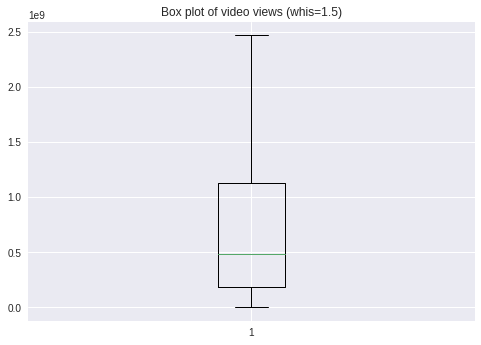

In [0]:
plt.boxplot(winsorized_views)
plt.title("Box plot of video views (whis=1.5)")
plt.show()

As we can see, the box plot reveals no outliers after winsorization.

## Transforming outliers



Another common way of dealing with outliers is to transform the variable. Transformation not only helps us with outliers but also with variables that are not normally distributed. When transforming the variable, we usually apply **monotonic transformations**. These are transformations that don't change the relative ordering of the values in a variable. **Log transformations** and **square root transformations** are two common monotonic transformations in data science.

To see the effect of a log transformation on the *Video views* variable, let's sketch the histogram of the original variable and the log transformed version:

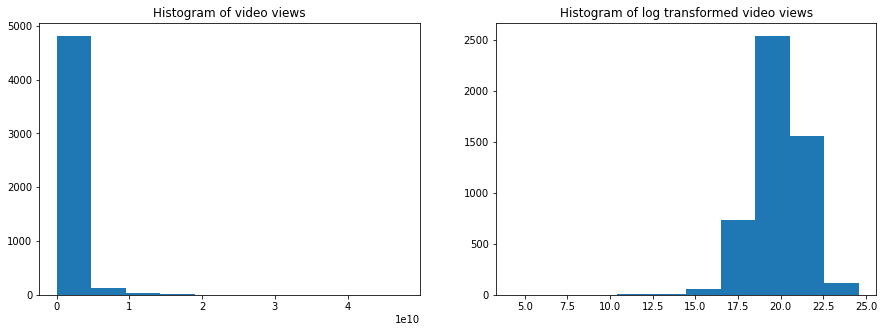

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")

plt.subplot(1,2,2)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of log transformed video views")
plt.show()

As we can see, the log-transformed variable more closely matches a normal distribution. This will help us apply statistical techniques for future analysis. But for now, let's look at the box plots of the original variable and its log-transformed variant to see whether log transformation has an effects on the outliers:

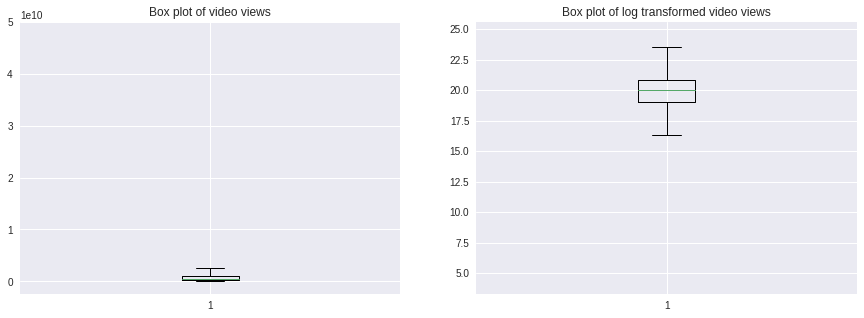

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views")

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube_df["Video views"]))
plt.title("Box plot of log transformed video views")
plt.show()

The chart on the right demonstrates that log transformation has narrowed the range of the values. The outliers that lie beyond the whiskers are now different than the ones on the left-hand chart. 

Next, let's apply Tukey's method to see if the number of outliers has decreased:

In [0]:
# now we take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(youtube_df["Video views"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(youtube_df["Video views"]) > max_val) 
                      | (np.log(youtube_df["Video views"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 326
The score threshold is: 1.5
Number of outliers is: 58
The score threshold is: 2.0
Number of outliers is: 19
The score threshold is: 2.5
Number of outliers is: 14
The score threshold is: 3.0
Number of outliers is: 13
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 6
The score threshold is: 4.5
Number of outliers is: 4


The number of outliers decreased dramatically after the log transformation.

## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?

2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?